# Stock Market Price prediction

In [1]:
#packages

import pandas as pd
import pytz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


## Downloading stock price data

In [2]:
import yfinance as yf

In [3]:
ticker= yf.Ticker("AAPL")

In [4]:
name= ticker.info["shortName"]
name

'Apple Inc.'

In [5]:
df= ticker.history(period= "10y")
#set period of data collected

In [6]:
#Show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-09-17 00:00:00-04:00,25.991756,26.178277,25.555788,25.600733,256450400,0.0,0.0
2015-09-18 00:00:00-04:00,25.216452,25.686130,25.140046,25.495111,297141200,0.0,0.0
2015-09-21 00:00:00-04:00,25.544551,25.926586,25.542305,25.890629,200888000,0.0,0.0
2015-09-22 00:00:00-04:00,25.479386,25.659167,25.286121,25.483881,201384800,0.0,0.0
2015-09-23 00:00:00-04:00,25.535569,25.780521,25.461411,25.690630,143026800,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-10 00:00:00-04:00,232.190002,232.419998,225.949997,226.789993,83440800,0.0,0.0
2025-09-11 00:00:00-04:00,226.880005,230.449997,226.649994,230.029999,50208600,0.0,0.0
2025-09-12 00:00:00-04:00,229.220001,234.509995,229.020004,234.070007,55824200,0.0,0.0


## Cleaning and visualising price data.

Convert timezone to Harare, Zimbabwe time.

In [7]:
df=df.tz_convert("africa/harare")

In [8]:
del df["Dividends"]
del df["Stock Splits"]

In [9]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-09-17 06:00:00+02:00,25.991756,26.178277,25.555788,25.600733,256450400
2015-09-18 06:00:00+02:00,25.216452,25.686130,25.140046,25.495111,297141200
2015-09-21 06:00:00+02:00,25.544551,25.926586,25.542305,25.890629,200888000
2015-09-22 06:00:00+02:00,25.479386,25.659167,25.286121,25.483881,201384800
2015-09-23 06:00:00+02:00,25.535569,25.780521,25.461411,25.690630,143026800
...,...,...,...,...,...
2025-09-10 06:00:00+02:00,232.190002,232.419998,225.949997,226.789993,83440800
2025-09-11 06:00:00+02:00,226.880005,230.449997,226.649994,230.029999,50208600
2025-09-12 06:00:00+02:00,229.220001,234.509995,229.020004,234.070007,55824200


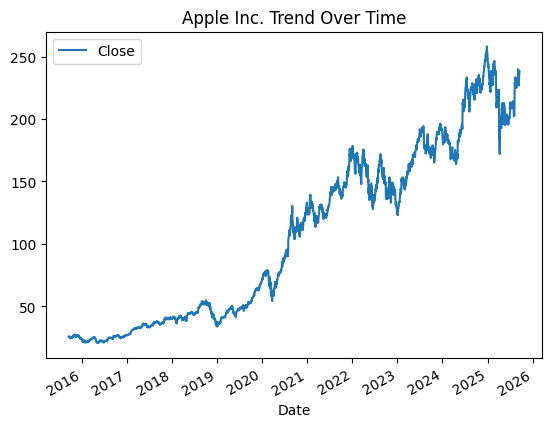

In [10]:
chart= df.plot.line(y="Close", title= (f"{name} Trend Over Time"), use_index=True);


## Setting up Prediction.

In [11]:
#creating a next day column and the closing price
df["Next Day"]= df["Close"].shift(-1)

In [12]:
df["Target"] = (df["Next Day"] >df["Close"]).astype(int)

In [13]:
df

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2015-09-17 06:00:00+02:00,25.991756,26.178277,25.555788,25.600733,256450400,25.495111,0
2015-09-18 06:00:00+02:00,25.216452,25.686130,25.140046,25.495111,297141200,25.890629,1
2015-09-21 06:00:00+02:00,25.544551,25.926586,25.542305,25.890629,200888000,25.483881,0
2015-09-22 06:00:00+02:00,25.479386,25.659167,25.286121,25.483881,201384800,25.690630,1
2015-09-23 06:00:00+02:00,25.535569,25.780521,25.461411,25.690630,143026800,25.843437,1
...,...,...,...,...,...,...,...
2025-09-10 06:00:00+02:00,232.190002,232.419998,225.949997,226.789993,83440800,230.029999,1
2025-09-11 06:00:00+02:00,226.880005,230.449997,226.649994,230.029999,50208600,234.070007,1
2025-09-12 06:00:00+02:00,229.220001,234.509995,229.020004,234.070007,55824200,236.699997,1


Target is if the price will go up or down on the next day.

 1 means price will go up,  0 means price will go down.


## Building and training a model

In [14]:
#instatiate model
model= RandomForestClassifier(random_state=1)

#predictors/ feature matrix
X= ["Close", "Volume", "High", "Low", "Open"]
#target vector
y= "Target"

#train and test sets
train= df.iloc[:-100]
test= df.iloc[-100:]

#train the model
model.fit(train[X], train[y])

RandomForestClassifier(random_state=1)

## Evaluating the model

In [15]:
preds= model.predict(test[X]) #  numpy array output of predictions.

In [16]:
preds= pd.DataFrame(preds, index= test.index) # array to dataframe

In [17]:
preds.columns= ["Next Day Prediction"] #name the column

In [18]:
precision_score(test[y], preds)

0.5303030303030303

The precision score shows how accurately the model predicted that the price would go up.

## Results

In [19]:
pred_res= pd.concat([test[y], preds], axis=1)

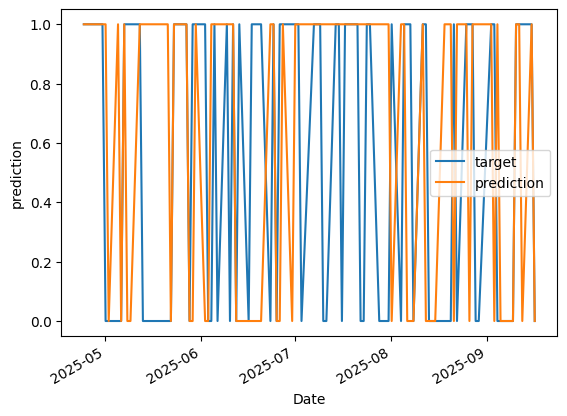

In [20]:
pred_res.plot(ylabel="prediction")
plt.legend(["target", "prediction"]);

Visual summary of model perfomance

In [21]:
preds.tail()

,Next Day Prediction
Date,
2025-09-10 06:00:00+02:00,1
2025-09-11 06:00:00+02:00,1
2025-09-12 06:00:00+02:00,0
2025-09-15 06:00:00+02:00,1
2025-09-16 06:00:00+02:00,0


The Prediction is of the next trading day.

1 means the price is predicted to go up.
0 means the price is predicted to go down.